In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data = pd.read_csv('Study2aLinearRegressionData.csv')

In [3]:
data = data.dropna()
data.describe()

,Subject,Gender,Age,Trait Anxiety,WTPabsmarketchange,WTPsignedmarketchange,vWTP
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,21.500000,0.642857,28.023810,42.214286,1.581229,1.228904,3.185740
std,12.267844,0.484966,11.614726,11.688092,2.960102,3.658151,16.310107
min,1.000000,0.000000,18.000000,20.000000,-5.010004,-6.731471,-72.765000
25%,11.250000,0.000000,21.000000,35.000000,-0.023476,-0.284264,0.067235
50%,21.500000,1.000000,23.500000,39.500000,0.348852,0.218364,0.900119
75%,31.750000,1.000000,30.750000,51.000000,2.852352,1.324775,7.272843
max,42.000000,1.000000,66.000000,68.000000,10.873688,15.388281,47.641414


In [4]:
for key in data.keys():
    print(key,"length of unique values:",len(set(data[key].tolist())))

Subject length of unique values: 42
Gender length of unique values: 2
Age length of unique values: 21
Trait Anxiety length of unique values: 30
WTPabsmarketchange length of unique values: 42
WTPsignedmarketchange length of unique values: 42
vWTP length of unique values: 42


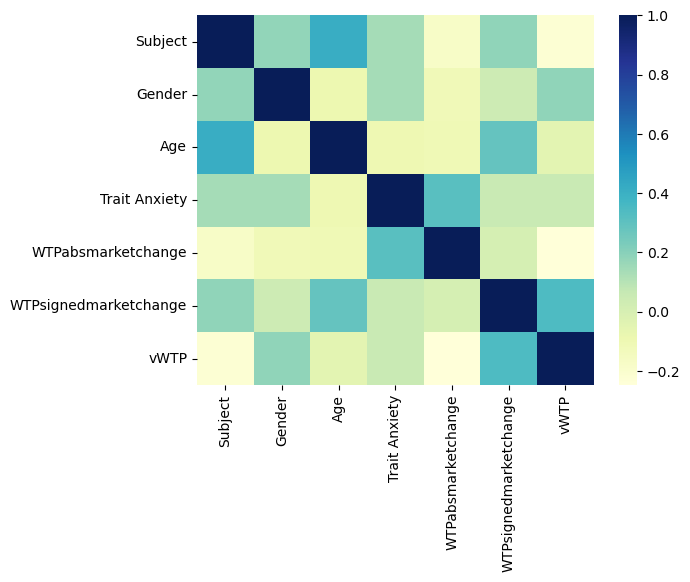

In [5]:
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu")
plt.show()

In [6]:
X=data
Y=data["vWTP"]
X = X.drop(['WTPabsmarketchange',"WTPsignedmarketchange","vWTP"], axis=1)

In [7]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,6.268014,Trait Anxiety
2,6.230957,Age
0,5.444430,Subject
1,2.866686,Gender


In [8]:
for f in X.columns:
    X[f] = (X[f] - X[f].mean()) / X[f].std()

In [9]:
data.rename(columns = {'Trait Anxiety':'Trait_Anxiety'}, inplace = True)

In [10]:
df=data
data=(df-df.mean())/df.std()

WTPabsmarketchange = β0 + β1* Trait Anxiety score + β2*Age + β3*Gender 

In [11]:
formula = 'vWTP ~ Gender + Age + Trait_Anxiety + Age * Trait_Anxiety'
model = smf.glm(formula = formula, data=data, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   vWTP   No. Observations:                   42
Model:                            GLM   Df Residuals:                       37
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 06 May 2023   Deviance:                       2062.6
Time:                        13:58:10   Pearson chi2:                 1.85e+17
No. Iterations:                    20   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -8.338e+15   1.05e+0

/home/debashish/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/debashish/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/home/debashish/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/home/debashish/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
